In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb

%load_ext autoreload
%autoreload 2
import P2P_functions as p2p

In [6]:
df_bhv=pd.read_csv('../Input/table_bhv.csv',index_col=[0])
selection=pd.read_csv('/data/home/alejandropena/Psychology/Input/selection_DE.csv')

In [7]:
selection.head()

,PV_size,name,sub_100_100,sub_100_75,sub_100_50,sub_100_25,sub_100_0,sub_75_100,sub_75_75,sub_75_50,...,sub_50_100,sub_50_75,sub_50_50,sub_50_25,sub_50_0,sub_25_100,sub_25_75,sub_25_50,sub_25_25,sub_25_0
0,5.0,52,True,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
1,8.0,13,True,True,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
2,7.1,19,True,True,False,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,5.4,56,True,False,True,False,False,True,True,False,...,False,False,False,False,False,True,True,False,True,False
4,4.6,38,True,True,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
len(selection.groupby('name').count().PV_size)

58

In [9]:
tmp_pair=pd.DataFrame(map(lambda X: dict({'id':X[0],'hh':X[1]}), list(zip(list(selection.name.unique()),list(df_bhv[df_bhv.will==1].hh.unique())))))

df_bhv_paired=pd.merge(left=tmp_pair, right=df_bhv, left_on='hh', right_on='hh')

df_bhv_paired.Price/=100

df_bhv_paired['Price_binned']=(np.digitize(df_bhv_paired.Price,[0.04,0.12,0.20,0.28]))

df_bhv_paired['SOC_binned']=(np.digitize(df_bhv_paired.SOC,[30,60,90]))

In [10]:
len(selection.name.unique())

58

# Select from those willing to participate the higher x% and lower x% of people that want to sell

In [11]:
df_p2p=df_bhv[df_bhv.will]

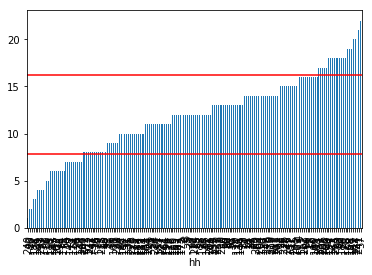

In [12]:
df_p2p.groupby('hh').sum().sell.sort_values().plot(kind='bar')
plt.axhline(df_p2p.groupby('hh').sum().sell.median()-df_p2p.groupby('hh').sum().sell.std(),color='red')
plt.axhline(df_p2p.groupby('hh').sum().sell.median()+df_p2p.groupby('hh').sum().sell.std(),color='red')

In [13]:
upper=df_p2p.groupby('hh').sum().sell.median()+df_p2p.groupby('hh').sum().sell.std()
lower=df_p2p.groupby('hh').sum().sell.median()-df_p2p.groupby('hh').sum().sell.std()

sell_group=df_p2p.groupby('hh').sum().sell

low_sell_group=sell_group[sell_group<lower]
high_sell_group=sell_group[sell_group>upper]

In [14]:
len(low_sell_group)

29

In [15]:
len(high_sell_group)

23

In [16]:
low_sell_group.index

Int64Index([  7,  20,  23,  30,  41,  43,  55,  62,  64,  90,  94,  96, 102,
            119, 122, 126, 130, 148, 171, 174, 175, 178, 187, 189, 192, 195,
            217, 233, 240],
           dtype='int64', name='hh')

In [17]:
high_sell_group.index

Int64Index([ 49,  57,  65,  80,  88,  93, 100, 120, 123, 139, 154, 158, 161,
            163, 182, 184, 198, 201, 206, 215, 231, 237, 241],
           dtype='int64', name='hh')

In [18]:
df_bhv[df_bhv.hh.isin(high_sell_group.index)].hh.unique()

array([ 49,  57,  65,  80,  88,  93, 100, 120, 123, 139, 154, 158, 161,
       163, 182, 184, 198, 201, 206, 215, 231, 237, 241])

In [19]:
tmp_pair=pd.DataFrame(map(lambda X: dict({'id':X[0],'hh':X[1]}), list(zip(list(selection.name.unique()),list(df_bhv[df_bhv.hh.isin(high_sell_group.index)].hh.unique())))))

df_bhv_paired=pd.merge(left=tmp_pair, right=df_bhv, left_on='hh', right_on='hh')

df_bhv_paired.Price/=100

df_bhv_paired['Price_binned']=(np.digitize(df_bhv_paired.Price,[0.04,0.12,0.20,0.28]))

df_bhv_paired['SOC_binned']=(np.digitize(df_bhv_paired.SOC,[30,60,90]))

In [20]:
dlow=pd.read_csv('df_50_50_DE_0.25_100_low_1000.csv',sep=',')
dhigh=pd.read_csv('df_50_50_DE_0.25_100_high_1000.csv',sep=',')
dnorm=pd.read_csv('df_50_50_DE_0.25_100_False_1000.csv',sep=',')


In [21]:
dlow.head()

,Unnamed: 0,index,SCR,SSR,EFC,Demand_peak,Inj_peak,avg_dod,Total_load,TotalPV,...,SCR_hh,SSR_hh,EFC_hh,Demand_peak_hh,Inj_peak_hh,avg_dod_hh,bill_hh,Imported_hh,Exported_hh,Batt_revenue_hh
0,0,No,48.024307,47.891243,NaN,150.758,238.260450,NaN,445550.533983,444316.018156,...,0.000000,0.000000,0.00000,6.546173,0.000000,0.000000,990.350979,4419.411112,0.000000,0.000000
1,1,PV,48.024307,47.891243,NaN,150.758,238.260450,NaN,445550.533983,444316.018156,...,23.526474,37.170256,0.00000,6.849208,5.127024,0.000000,419.959245,2777.709788,6622.180670,0.000000
2,2,PV_batt,48.024307,47.891243,NaN,150.758,238.260450,NaN,445550.533983,444316.018156,...,42.272381,79.768962,209.43449,5.461392,5.624778,0.573793,16.283489,1050.417980,5226.079035,248.248288
3,3,No,47.908610,47.775866,NaN,150.758,238.261045,NaN,445550.533983,444316.018156,...,0.000000,0.000000,0.00000,6.546173,0.000000,0.000000,1237.435111,4419.411112,0.000000,0.000000
4,4,PV,47.908610,47.775866,NaN,150.758,238.261045,NaN,445550.533983,444316.018156,...,23.526474,37.170256,0.00000,6.849208,5.127024,0.000000,512.871514,2777.709788,6622.180670,0.000000


In [22]:

dlow.groupby('Comm').median()[['SCR','SSR','bill']]

,SCR,SSR,bill
Comm,,,
P2P,50.407961,48.769012,63380.077034
SC,49.576380,47.912072,80543.569977


In [23]:
dhigh.groupby('Comm').median()[['SCR','SSR','bill']]

,SCR,SSR,bill
Comm,,,
P2P,52.789085,51.057312,63682.324590
SC,49.576380,47.912072,80543.569977


In [24]:
dnorm.groupby('Comm').median()[['SCR','SSR','bill']]

,SCR,SSR,bill
Comm,,,
P2P,51.833038,50.089555,62153.930155
SC,49.576380,47.912072,80543.569977


In [25]:
dnorm.shape

(6000, 37)

In [26]:
dlow.groupby(['Comm','index']).median()[['SCR_hh','SSR_hh','bill_hh']]

SCR_hh     SSR_hh      bill_hh
Comm index                                     
P2P  No        0.000000   0.000000  1049.230691
     PV       23.631220  39.583187   414.282366
     PV_batt  43.799940  76.706142    22.714373
SC   No        0.000000   0.000000  1312.064752
     PV       23.631220  39.583187   512.389962
     PV_batt  46.389037  81.417207    89.304748

In [27]:
dhigh.groupby(['Comm','index']).median()[['SCR_hh','SSR_hh','bill_hh']]

SCR_hh     SSR_hh      bill_hh
Comm index                                     
P2P  No        0.000000   0.000000  1049.230691
     PV       23.631220  39.583187   416.274008
     PV_batt  32.069682  55.577586    31.780454
SC   No        0.000000   0.000000  1312.064752
     PV       23.631220  39.583187   512.389962
     PV_batt  46.389037  81.417207    89.304748

In [28]:
dnorm.groupby(['Comm','index']).median()[['SCR_hh','SSR_hh','bill_hh']]

SCR_hh     SSR_hh      bill_hh
Comm index                                     
P2P  No        0.000000   0.000000  1049.230691
     PV       23.631220  39.583187   413.946550
     PV_batt  39.734110  69.247830   -25.927731
SC   No        0.000000   0.000000  1312.064752
     PV       23.631220  39.583187   512.389962
     PV_batt  46.389037  81.417207    89.304748

In [29]:
dnorm['trading']='Normal'
dhigh['trading']='High'
dlow['trading']='Low'

In [34]:
d.head()

,trading,Comm,index,SCR_hh,SSR_hh,bill_hh
0,High,P2P,No,0.000000,0.000000,990.350979
1,High,P2P,PV,23.526474,37.170256,422.323953
2,High,P2P,PV_batt,31.112226,56.884965,-13.871843
3,High,SC,No,0.000000,0.000000,1237.435111
4,High,SC,PV,23.526474,37.170256,512.871514


In [30]:
d=pd.concat([dhigh.loc[:,['trading','Comm','index','SCR_hh','SSR_hh','bill_hh']],dnorm.loc[:,['trading','Comm','index','SCR_hh','SSR_hh','bill_hh']],
            dlow.loc[:,['trading','Comm','index','SCR_hh','SSR_hh','bill_hh']]])

In [31]:
d.to_csv('Optim_trading.csv')

In [32]:
d2=pd.concat([dhigh.loc[:,['trading','Comm','SCR','SSR','bill']],dnorm.loc[:,['trading','Comm','SCR','SSR','bill']],
              dlow.loc[:,['trading','Comm','SCR','SSR','bill']]])

In [33]:
d2.to_csv('Optim_trading_comm.csv')